### 🎯 **Objective of the Code / Objetivo del Código** 🎯

**English**:  
The goal of this code is to **visualize the market share** of different XR (AR & VR) headsets over several quarters, like Meta (Oculus), DPVR, Pico, and Others. 😎

It reads data from a CSV file 📊, transforms it to make it easier to work with, and then **creates a stacked bar plot** 📈 to show how the sales of each headset change over time. It also uses cool colors 🎨 to make the graph pop and look clean 🧼. Finally, it adds a title 🏷️, a footer 📜, and a fun little red line 🟥 at the top for style points!

In short: **It’s all about presenting the data in a super clear and visually appealing way!** 😁👾

---

**Español**:  
El objetivo de este código es **visualizar la participación de mercado** de diferentes dispositivos XR (AR & VR) durante varios trimestres, como Meta (Oculus), DPVR, Pico y Otros. 😎

El código lee datos de un archivo CSV 📊, los transforma para hacerlos más fáciles de trabajar, y luego **crea un gráfico de barras apiladas** 📈 para mostrar cómo cambian las ventas de cada dispositivo a lo largo del tiempo. También utiliza colores geniales 🎨 para que el gráfico sea llamativo y se vea limpio 🧼. Al final, añade un título 🏷️, un pie de página 📜 y una línea roja divertida 🟥 en la parte superior para darle estilo.

En resumen: **¡Es todo sobre presentar los datos de una manera clara y visualmente atractiva!** 😁👾


               Q1 2020  Q2 2020  Q3 2020  Q4 2020  Q1 2021  Q2 2021  Q3 2021  \
Headsets                                                                       
Meta (Oculus)       34       32       29       74       75       67       73   
DPVR                 7        8        8        4        6        9       10   
Pico                 6       10       11        3        3        6        6   
Others              53       50       52       19       16       18       11   

               Q4 2021  
Headsets                
Meta (Oculus)       80  
DPVR                 8  
Pico                 5  
Others               7   

Headsets  Meta (Oculus)  DPVR  Pico  Others
Q1 2020              34     7     6      53
Q2 2020              32     8    10      50
Q3 2020              29     8    11      52
Q4 2020              74     4     3      19
Q1 2021              75     6     3      16
Q2 2021              67     9     6      18
Q3 2021              73    10     6      11
Q4 2021        

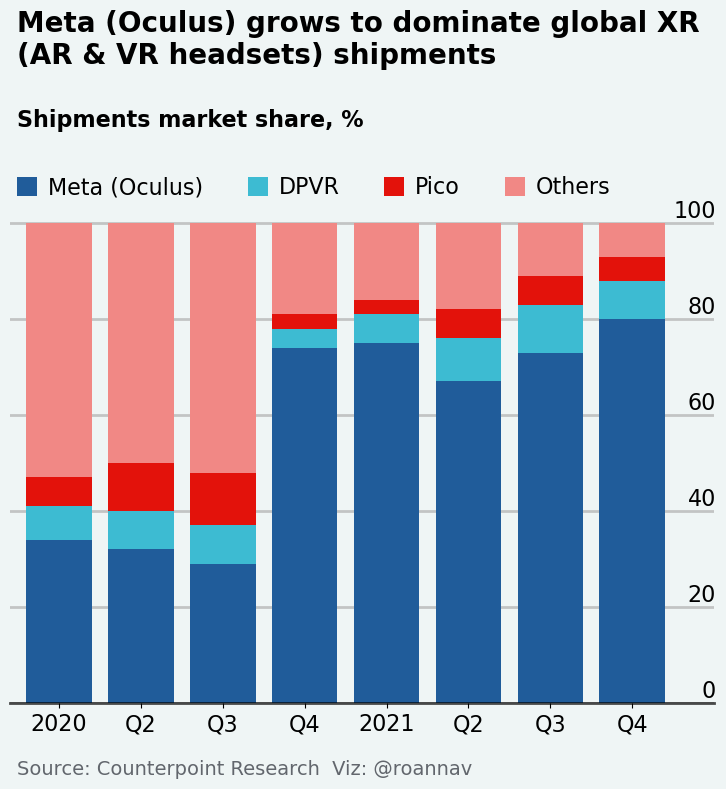

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

############################################################
#  Read data, explore data, transform dataframe
############################################################

# Read the .csv file which contains a header row.
# Leer el archivo .csv que contiene una fila de encabezado.
df = pd.read_csv("xr_headsets.csv")

# Rename the column to make it simpler
# Renombrar la columna para hacerlo más sencillo.
df.rename(columns = {'Global XR (AR & VR Headsets) Shipments Market Share':'Headsets'}, inplace = True)

# Set the 'Headsets' column as the index of the DataFrame
# Establecer la columna 'Headsets' como índice del DataFrame
df.set_index('Headsets', inplace=True)
print(df.head(5), '\n')

'''
               Q1 2020  Q2 2020  Q3 2020  ...  Q2 2021  Q3 2021  Q4 2021
Headsets                                  ...                           
Meta (Oculus)       34       32       29  ...       67       73       80
DPVR                 7        8        8  ...        9       10        8
Pico                 6       10       11  ...        6        6        5
Others              53       50       52  ...       18       11        7

[4 rows x 8 columns]
'''

# Transpose the dataframe so that the quarters are rows and headsets are columns
# Transponer el DataFrame para que los trimestres sean filas y los dispositivos sean columnas.
df = df.transpose()
print(df.head(8))

# Display the index and columns of the transposed dataframe
# Mostrar el índice y las columnas del DataFrame transpuesto.
print("\ndf.index")
print(df.index)

print("\ndf.columns")
print(df.columns)

# Remove the label of the column index
# Eliminar la etiqueta del índice de columna
df.columns.name = None

# Reset index to make it a column in the DataFrame
# Restablecer el índice para convertirlo en una columna del DataFrame
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'Headsets'})

# Show the updated columns
# Mostrar las columnas actualizadas
print("\ndf.columns")
print(df.columns)

# Print the full DataFrame
# Imprimir el DataFrame completo
print(" ")
print(df)
print(" ")

# Labels for the x-axis (quarters)
# Etiquetas para el eje x (trimestres)
labels = ['Q1 2020', 'Q2 2020', 'Q3 2020', 'Q4 2020', 
          'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021' ]

# Headsets categories
# Categorías de dispositivos
headsets = ['Meta (Oculus)', 'DPVR', 'Pico', 'Others'] 

#################################################################
#  COLORS
#################################################################

# Background color and colors grabbed from actual The Economist charts
# Color de fondo y colores tomados de los gráficos reales de The Economist
Paris95 = '#EFF5F5'   # Main background color
# Color principal de fondo
Red = '#e3120b'
Pink = '#f18885'
Aqua = '#3dbbd2'
FadedBlue = '#205c9a'

# Tick and text font color
# Color de la fuente de las marcas y el texto
Slate = '#262A33' # Dark grey
# Gris oscuro

############################################################
#  Create Plot 
############################################################

# Set up the plot using the object-oriented style of matplotlib
# Configurar el gráfico utilizando el estilo orientado a objetos de matplotlib
fig, ax = plt.subplots(
    figsize = (8,9)    # Size of the figure in inches
    # Tamaño de la figura en pulgadas
)

# Adjust the figure layout
# Ajustar la disposición de la figura
fig.subplots_adjust(left=0.06,
    right=0.94,
    bottom=0.14,
    top=0.70)

# Set background colors for the axes and figure
# Establecer los colores de fondo para los ejes y la figura
ax.set_facecolor(Paris95)          
fig.patch.set_facecolor(Paris95)   

############################################################
#  Grid, Spines, Ticks 
############################################################

# Enable horizontal grid lines with custom properties
# Habilitar líneas de cuadrícula horizontales con propiedades personalizadas
ax.grid(axis='y', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(True)  # Ensure that ticks and gridlines are below all other elements
# Asegurar que las marcas y las líneas de la cuadrícula estén por debajo de todos los demás elementos

# Hide top, right, and left spines of the plot
# Ocultar los bordes superior, derecho e izquierdo del gráfico
ax.spines[['top','right','left']].set_visible(False)

# Set properties for the bottom spine
# Establecer propiedades para el borde inferior
ax.spines['bottom'].set(linewidth=2, alpha=0.7)

# Define tick labels for the x-axis
# Definir las etiquetas de las marcas para el eje x
x_tick_labels = ['2020', 'Q2', 'Q3', 'Q4', 
                 '2021', 'Q2', 'Q3', 'Q4' ]  
ax.set_xticks(range(8), labels=x_tick_labels, fontsize=16)

# Set the x-axis limits
# Establecer los límites del eje x
ax.set_xlim(-0.6, 8.0)

# Define tick labels for the y-axis
# Definir las etiquetas de las marcas para el eje y
y_tick_labels = range(0,101,20)  
ax.set_yticks(range(0,101,20), labels=y_tick_labels, ha='right', va='bottom')

# Customize y-axis tick parameters
# Personalizar los parámetros de las marcas del eje y
ax.yaxis.set_tick_params(
    pad=-2,             # Pad tick labels so they don't overlap
    # Ajustar las etiquetas de las marcas para que no se superpongan
    labeltop=True,      # Place x-axis labels at the top
    # Colocar las etiquetas del eje x en la parte superior
    labelbottom=False,  # Remove x-axis labels from the bottom
    # Eliminar las etiquetas del eje x en la parte inferior
    bottom=False,       # Remove ticks from the bottom
    # Eliminar las marcas del eje x en la parte inferior
    labelsize=16)       # Set tick label font size
    # Establecer el tamaño de la fuente de las etiquetas de las marcas

############################################################
#  Bar Plot 
############################################################

# Stack the bars to represent the total market share for each headset
# Apilar las barras para representar la participación total de mercado de cada dispositivo
y3 = df[headsets[3]]
y2 = df[headsets[2]]
y1 = df[headsets[1]]
y0 = df[headsets[0]]

# Plot each headset category as a stacked bar
# Graficar cada categoría de dispositivo como una barra apilada
ax.bar(labels, y0, color=FadedBlue, label=headsets[0])
ax.bar(labels, y1, color=Aqua, bottom=y0, label=headsets[1])
ax.bar(labels, y2, color=Red, bottom=y0+y1, label=headsets[2])
ax.bar(labels, y3, color=Pink, bottom=y0+y1+y2, label=headsets[3])

############################################################
#  Legend 
############################################################

# Customize the plot legend
# Personalizar la leyenda del gráfico
ax.legend(
    loc=(0.01,1),      # Place legend at the top left
    # Colocar la leyenda en la parte superior izquierda
    ncol=4,            # Display 4 columns in the legend
    # Mostrar 4 columnas en la leyenda
    frameon=False,     # Remove the border around the legend
    # Eliminar el borde alrededor de la leyenda
    borderpad=0,       # Remove padding inside the legend
    # Eliminar el relleno dentro de la leyenda
    handlelength=0.9,  # Length of the legend handles (color boxes)
    # Longitud de los manejadores de la leyenda (cuadros de color)
    handleheight=0.9,  # Height of the legend handles
    # Altura de los manejadores de la leyenda
    handletextpad=0.5, # Padding between legend handle and text
    # Espaciado entre el manejador y el texto en la leyenda
    fontsize=16)       # Set font size for legend text
    # Establecer el tamaño de fuente para el texto de la leyenda

############################################################
#  Red Tag (Rectangle) at the Top 
############################################################

# Draw a red line across the top of the plot
# Dibujar una línea roja en la parte superior del gráfico
ax.plot([0.075, 0.16],               # Line width
        [0.94, 0.94],                # Line y-position
        transform=fig.transFigure,   # Set location relative to figure
        clip_on=False,
        color=Red,
        linewidth=8)

#########################################################################
#  Title Area
#########################################################################

# Add a main title to the plot
# Agregar un título principal al gráfico
plt.figtext(0.069, 0.85,
    "Meta (Oculus) grows to dominate global XR\n(AR & VR headsets) shipments", 
    fontsize=20,
    fontweight='bold')

# Add a subtitle below the main title
# Agregar un subtítulo debajo del título principal
plt.figtext(0.069, 0.78,
    "Shipments market share, %",
    ha="left",
    fontsize=16,
    fontweight='bold')

#########################################################################
#  Footer
#########################################################################

# Add a footer with the source and visualization creator information
# Agregar un pie de página con la fuente y la información del creador de la visualización
plt.figtext(0.069, 0.06,
    "Source: Counterpoint Research  Viz: @roannav",
    ha="left",
    fontsize=14,
    color=Slate,
    alpha=0.7)

# Save the plot as a PNG file
# Guardar el gráfico como un archivo PNG
plt.savefig('day12_TheEconomist.png')
